In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
data = pd.read_csv('../data/raw_postpro.csv')
# 컬럼 삭제
df = data.drop(['청구서번호','No.',  '선박입고','완료 여부','리드타임_음수제거','청구량','견적','견적수량','견적화폐','견적단가','발주번호','발주','발주수량','발주금액','미입고 기간','리드타임','창고입고','창고입고수량','입고창고','창고출고','창고출고수량','출고선박','출고운반선','선박입고','선박입고수량','완료 여부'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject      20517 non-null  object
 1   Machinery    20517 non-null  object
 2   Assembly     20517 non-null  object
 3   청구품목         20517 non-null  object
 4   Part No.1    20517 non-null  object
 5   Part No.2    20517 non-null  object
 6   key1         20517 non-null  object
 7   key2         20517 non-null  object
 8   발주처          20517 non-null  object
 9   D/T          20517 non-null  object
 10  Control No.  20517 non-null  object
 11  leadtime     20517 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [7]:
df = df[['청구품목','발주처','Machinery', 'Assembly' , "Part No.1", "Part No.2",'key2']]
# 'Machinery', 'Assembly', '청구품목', 'Part No.1', 'Part No.2', 'key1', '발주처'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   청구품목       20517 non-null  object
 1   발주처        20517 non-null  object
 2   Machinery  20517 non-null  object
 3   Assembly   20517 non-null  object
 4   Part No.1  20517 non-null  object
 5   Part No.2  20517 non-null  object
 6   key2       20517 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [9]:
from sklearn import preprocessing
label_encoders = {}  # 각 열에 대한 LabelEncoder를 저장하기 위한 딕셔너리
columns_to_encode = ['key2']  # 인코딩을 수행할 열의 이름 리스트

for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    label_encoders[column] = le # 딕셔너리에 저장
    df[column+"_encoded"] = le.transform(df[column]) # 새로운 encoding 된 컬럼 추가

In [10]:
df = df.drop(['key2'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   청구품목          20517 non-null  object
 1   발주처           20517 non-null  object
 2   Machinery     20517 non-null  object
 3   Assembly      20517 non-null  object
 4   Part No.1     20517 non-null  object
 5   Part No.2     20517 non-null  object
 6   key2_encoded  20517 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 1.0+ MB


In [12]:
# df_desc = df[[ '청구품목', '발주처']].apply(lambda row: ' '.join(row), axis=1)
df_desc = df[[ '청구품목', '발주처','Machinery', 'Assembly' , "Part No.1", "Part No.2"]].apply(lambda row: ' '.join(row), axis=1)

In [13]:
lis = df_desc.values

In [14]:
cnt = 0
for i in lis:
    print(i)
    cnt += 1
    if cnt == 20:
        break

SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 323-6480 LINES GP-FUEL  7.00E-275 0
OIL COOLER & LINES HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE GASKET KIT 7.00E-275 0
WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 285-8374 MANIFOLD GP-EXH  7.00E-275 0
BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 159-8828 TURBO GP 7.00E-275 0
SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 2N4727 INSTRUMNT PANEL GP 7.00E-275 0
CORE CHARGES FOR CYLINDER PACK AS HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 8N-6224 PISTON GP-ROD& 7.00E-275 0
PUMP GP-F TFR-REMAN HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 8N-6151 PUMP GP-F TFR  7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 8N-7174 GEAR GP-FRONT  7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 8N-7174 GEAR GP-FRONT  7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 8N-7174 GEAR GP-FRONT  7.00E-275 0
GEAR-WTR PUMP DR HAEIN

In [15]:
desc = df_desc.to_frame()

In [16]:
desc['key2'] = df['key2_encoded']

In [17]:
desc

,0,key2
0,SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1...,18
1,OIL COOLER & LINES HAEIN Coporation_Cheonan NO...,18
2,WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR...,18
3,BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 G...,18
4,SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR E...,18
...,...,...
20512,HYD. CYLINDER_NET BOAT DAVIT MARINE HYDROTEC C...,20
20513,HYD. CYLINDER_N.D CRANE_BOOM_LIFTER MARINE HYD...,20
20514,"PULLY PORT RELIEF ENGINEERING CO.,LTD. 6M NET ...",5
20515,"CYLINDER PORT RELIEF ENGINEERING CO.,LTD. 7M ...",20


In [18]:
desc.columns = ['origin','key2']

In [19]:
desc.head()

,origin,key2
0,SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1...,18
1,OIL COOLER & LINES HAEIN Coporation_Cheonan NO...,18
2,WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR...,18
3,BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 G...,18
4,SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR E...,18


In [28]:
X = desc['origin'].values

In [29]:
y = desc['key2'].values

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
sequences[:5] # 상위 5개 샘플 출력

[[28,
  26,
  21,
  269,
  6,
  7,
  8,
  3,
  4,
  9,
  2,
  1016,
  1209,
  59,
  5,
  54,
  292,
  1670,
  1450,
  1],
 [31, 103, 59, 6, 7, 8, 3, 44, 9, 2, 27, 47, 292, 1670, 1450, 1],
 [86, 6, 7, 8, 3, 44, 9, 2, 278, 282, 73, 5, 156, 292, 1670, 1450, 1],
 [76, 306, 197, 6, 7, 8, 3, 4, 9, 2, 499, 589, 150, 5, 292, 1670, 1450, 1],
 [28, 6, 7, 8, 3, 4, 9, 2, 4715, 4716, 231, 5, 292, 1670, 1450, 1]]

In [45]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print('단어 집합(Vocabulary)의 크기 :',vocab_size)

단어 집합(Vocabulary)의 크기 : 12213


문장의 최대 길이 : 35
문장의 평균 길이 : 17.162840571233613


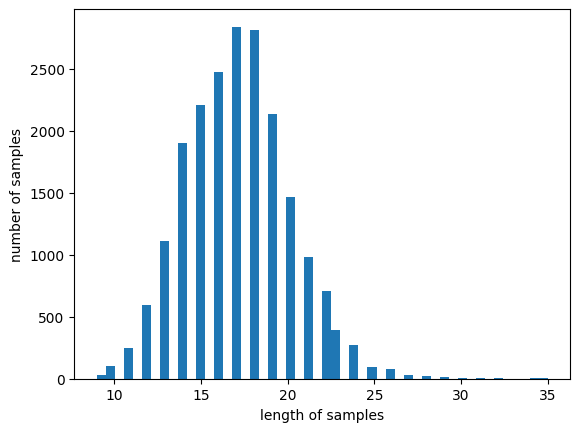

In [89]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2, random_state=42,shuffle=True)

In [91]:
# 딥러닝 모델을 만들기 위해 categorical 함수 사용
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=61)
# y_train_categorical = to_categorical(np.asarray(y_train))
# to_categorical(np.asarray(label_train))
y_test_categorical = to_categorical(y_test, num_classes=61)
# y_test_categorical = to_categorical(np.asarray(y_test))

In [92]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [93]:
max_len = 36

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
print('훈련 데이터의 크기(shape):', X_train.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train_categorical.shape)

훈련 데이터의 크기(shape): (16413, 36)
훈련 데이터 레이블의 크기(shape): (16413, 61)


In [94]:
print('훈련 데이터의 첫번째 샘플 :',X_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',y_train_categorical[0])

훈련 데이터의 첫번째 샘플 : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  434   34   36   30   17   11   41   16   10
    2   29  101   31  708 3575 2771    1]
훈련 데이터의 첫번째 샘플의 레이블 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [95]:
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [ 9133 14594 14004 ... 11188  8276   947]


In [96]:
len(indices)

16413

In [97]:
X_train = X_train[indices]
y_train_categorical = y_train_categorical[indices]

In [98]:
n_of_val = int(0.1 * X_train.shape[0])
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 1641


In [99]:
X_train = X_train[:-n_of_val]
y_train_categorical = y_train_categorical[:-n_of_val]
X_val = X_train[-n_of_val:]
y_val = y_train_categorical[-n_of_val:]

In [101]:
print('훈련 데이터의 크기(shape):', X_train.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train_categorical.shape)

훈련 데이터의 크기(shape): (14772, 36)
훈련 데이터 레이블의 크기(shape): (14772, 61)


In [103]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 120
hidden_units = 64
num_classes = 61

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
# model.add(Dropout(0.5))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# history = model.fit(X_train, y_train_categorical, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_val, y_val))
history = model.fit(X_train, y_train_categorical, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
116/116 [==============================] - 8s 65ms/step - loss: 3.4363 - acc: 0.1916 - val_loss: 3.2188 - val_acc: 0.1901
Epoch 2/10
116/116 [==============================] - 8s 66ms/step - loss: 2.8881 - acc: 0.2702 - val_loss: 2.5141 - val_acc: 0.3906
Epoch 3/10
116/116 [==============================] - 8s 67ms/step - loss: 2.1101 - acc: 0.5012 - val_loss: 1.7452 - val_acc: 0.6002
Epoch 4/10
116/116 [==============================] - 8s 68ms/step - loss: 1.4428 - acc: 0.6683 - val_loss: 1.1239 - val_acc: 0.7471
Epoch 5/10
116/116 [==============================] - 8s 67ms/step - loss: 1.0048 - acc: 0.7739 - val_loss: 0.7721 - val_acc: 0.8233
Epoch 6/10
116/116 [==============================] - 8s 68ms/step - loss: 0.7155 - acc: 0.8430 - val_loss: 0.5356 - val_acc: 0.8873
Epoch 7/10
116/116 [==============================] - 8s 68ms/step - loss: 0.5458 - acc: 0.8844 - val_loss: 0.3774 - val_acc: 0.9287
Epoch 8/10
116/116 [==============================] - 8s 67ms/step - 

In [134]:
y_pred= model.predict(X_test)                    

129/129 [==============================] - 1s 4ms/step


In [135]:
model.evaluate(X_test, y_test_categorical)[1]

129/129 [==============================] - 1s 4ms/step - loss: 0.6189 - acc: 0.8767


0.8767056465148926

In [136]:
# y_pred 랑 y_test 를 원래 labeling 된 데이터로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

In [137]:
y_pred_classes[:100],y_test_classes[:100]

(array([54, 33, 24, 45, 24, 57, 41, 10,  4, 41, 57, 20, 26, 50, 26, 24, 56,
        57, 40, 30, 40, 57,  8, 38, 24,  4, 46, 37, 57, 18, 24, 24,  4,  4,
        51, 40,  0,  6, 58, 24, 26, 24, 19, 50, 24, 48, 10,  4, 51,  4, 39,
        46, 56,  7, 20, 33, 34, 25, 58, 10, 12, 48, 24, 56, 24, 24, 37,  4,
        33, 40, 22,  8, 23, 44, 45, 20, 40,  8, 56, 42, 40, 24, 24, 45, 20,
        36, 26, 24, 46, 42, 24, 18, 45, 40, 40, 26, 58, 19, 24, 46],
       dtype=int64),
 array([54, 33, 24, 45, 24, 57, 41, 10,  4, 41, 57, 20, 26, 41, 26, 24, 56,
        57, 40, 30, 40, 57,  8, 38, 24,  4, 46, 37, 57, 56, 24, 24,  4,  4,
        51, 40,  0,  6, 58, 24, 26, 42, 19, 50, 24, 48, 10,  4,  7,  4, 39,
        46, 56,  7, 20, 33, 34, 25, 58, 10, 12, 48, 24, 56, 24, 24, 37,  4,
        33, 40, 22,  8, 23, 44, 45, 20, 40,  8, 56, 42, 40, 24, 24, 45, 20,
        36, 26, 24, 46, 42, 24, 18, 45, 40, 40, 24, 58, 19, 24, 26],
       dtype=int64))

In [138]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,classification_report
# from seqeval.metrics import f1_score, classification_report
f1 = f1_score(y_pred_classes, y_test_classes, average='macro')
f1

0.7516922903850422

## f1 : 0.828
### model.add(Dropout(0.1)) 추가 ->

In [124]:
print(classification_report(y_pred_classes, y_test_classes))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.57      1.00      0.73         4
           2       0.71      0.75      0.73        16
           3       0.60      1.00      0.75         6
           4       0.90      0.95      0.92       205
           5       0.80      1.00      0.89         8
           6       1.00      0.93      0.96        14
           7       0.91      0.84      0.87        25
           8       0.89      0.88      0.88       177
           9       0.00      0.00      0.00         0
          10       0.92      0.96      0.94        48
          11       1.00      1.00      1.00         3
          12       0.82      0.94      0.88        34
          13       0.82      0.82      0.82        17
          14       0.57      1.00      0.73         4
          15       0.60      0.60      0.60         5
          16       0.94      1.00      0.97        15
          17       0.77    

C:\workspace\ShipSupplies\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\workspace\ShipSupplies\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\workspace\ShipSupplies\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
